# Titanic: Machine Learning from Disaster

Predict survival on the Titanic

## Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.On **April 15, 1912**, during her maiden voyage, the Titanic sank after colliding with an iceberg,killing **1,502** out of **2,224** passengers and crew.This sensational tragedy shocked the international community and led to better safety regulations for ships. 

- One of the reasons that the shipwreck led to such loss of life was that:
    - there were not enough lifeboats for the passengers and crew.
    - Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as:
        - women, children, and the upper-class.

## Goal:

Apply machine learning techniques to successfully predict which passengers survived the sinking of the Titanic

## Machine Learning "Binary Classification"

- Use pandas for data manipulation
- Use matplotlib and seaborn for data visualization
- Learn to build models with scikit-learn
- Use cross-validation to make sure your model generalizes to new data (i.e., it doesn’t “overfit”)
- Use parameter tuning and grid search to select the best performing model out of several different classification algorithms

### Feature Engineering

Using existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.

### Metric

Score is the percentage of passengers that correctly predict. This is known simply as **"accuracy”**.

### XGBoost

- Learn how to use the extremely popular XGBoost algorithm.

### Ensembling/Stacking:

- Use the fundamental skill of “ensembling” to combine the predictions of several models

# Exploratory Data Analysis (EDA)

With a dataset of 891 passenger samples for our training set and their associated labels containing features like sex, age, and class etc.. attempt to predict the survivors of a small test group of 418 samples in the same format.

|Variable Name | Description
|:-------------:|:-------------|
| PassengerId | Passenger's id
| Survived | Survived (1) or died (0)
| Pclass | Passenger’s class (1 = Upper, 2 = Middle, 3 = Lower)
| Name | Passenger’s name
| Sex| Passenger’s sex
| Age| Passenger’s age
| SibSp | Number of siblings/spouses aboard
| Parch | Number of parents/children aboard
| Ticket | Ticket number
| Fare | Passenger’s fare
| Cabin | Cabin number
| Embarked | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# Configure visualisations
%matplotlib inline
plt.style.use('ggplot')

# Configure seaborn
sns.set_style('white',{"xtick.major.size": 5, "ytick.major.size": 5})


plt.rcParams['figure.figsize'] = (15,6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 18

import warnings
warnings.filterwarnings('ignore')

In [2]:
# The training set should be used to build your machine learning models.
train_df = pd.read_csv('train.csv')

# The test set should be used to see how well your model performs on unseen data. 
test_df = pd.read_csv('test.csv')

In [3]:
print(train_df.shape, test_df.shape)

(891, 12) (418, 11)


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df['Sex'] = train_df['Sex'].str.capitalize()
test_df['Sex'] = test_df['Sex'].str.capitalize()

In [6]:
# Combine train and test data
all_data = pd.concat([train_df, test_df], ignore_index=True)

In [7]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",Male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",Female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",Male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",Male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
# Features are available in dataset
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Data Types

#### Categorical features
- **Nominal:** Survived, Sex and Embarked
- **Ordinal:** Pclass

#### Numerical Features
- **Continous:** Age, Fare
- **Discrete:** SibSp, Parch

#### Features are mixed data types

Numerical, alphanumeric data within same feature.

- **Ticket**: is a mix of numeric and alphanumeric data types.
- **Cabin**: is alphanumeric.

Total samples are **891** or **40%** of the actual number of passengers on board the Titanic.

In [9]:
train_df.info()
print("--"*25)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

### Missing Values
- **Age,Cabin,Embarked and Fare** features contains blank,null or empty values.

In [10]:
all_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
missingValue = pd.DataFrame(all_data.iloc[:,2:].isnull().sum(axis=0).sort_values(ascending=False),columns=['NaN'])
missingValue["Percentage"]= missingValue.NaN.apply(lambda x: '{:.2f}%'.format((float(x)/all_data.shape[0])*100))
missingValue[missingValue.NaN > 0] 

,NaN,Percentage
Cabin,1014,77.46%
Age,263,20.09%
Embarked,2,0.15%
Fare,1,0.08%


### Analyzing Features

Observations for all features:

- **Sex**: The chance of survival for women is high as compared to men.

- **Pclass**: Higher socio-economic status passenger survived more than others. Being a first class passenger have better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2.

- **Age**: Younger passenger survived more than other passengers like children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

- **Embarked**: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

- **Parch + SibSp** : Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

### Taget Variable

- **Survived**

#### How many survived?

It is evident that not many passengers survived the accident

- Out of **891** passengers in training set, only **342** survived **38.4%** of the total training set survived.

In [12]:
#plt.suptitle("How many people Died and Survived on the Titanic", fontsize=15)
#labels=['Died', 'Survived']
#train_df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', labels=labels,colors=['red','green'], shadow=True, startangle=90)


In [13]:
# Text Annotation
def text_annotate(cnt):
    for i in cnt.patches:
        height = i.get_height()
        cnt.text(i.get_x() + i.get_width()/2, height,'%d' % int(height),ha='center',va='bottom')

In [14]:
pclass = {1:'Upper',2:'Middle',3:'Lower'}
survived = {0:'No',1:'Yes'}
embark = {'C':' Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

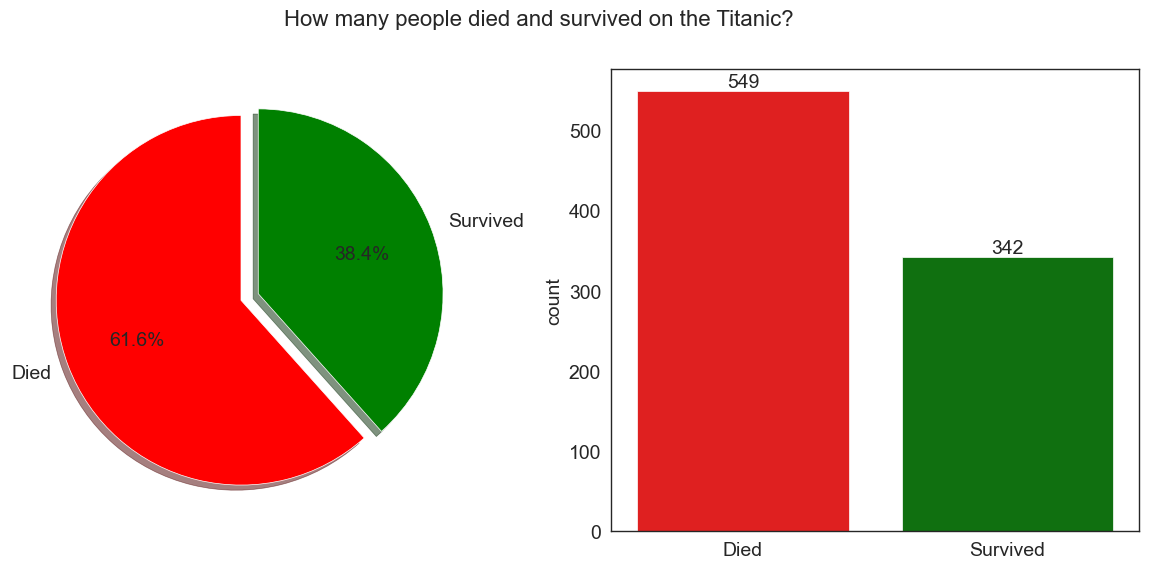

In [15]:
fig,axes=plt.subplots(1,2)
plt.suptitle('How many people died and survived on the Titanic?',fontsize=16)
labels = ['Died','Survived']
# Pie chart
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[0],
                                             labels=labels,colors=['red','green'], shadow=True, startangle=90)

axes[0].set_ylabel('')
# Bar chart
cnt = sns.countplot(x = 'Survived', data=train_df, palette=['red', 'green'], ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_xticklabels(labels)
text_annotate(cnt)
plt.show()

### Passenger's Gender

**Is there a pattern in survivability based on gender?**

- How many women and men survived?

    - It looks like more women survived as comapred to men

In [16]:
train_df.groupby(['Sex', 'Survived'])['Survived'].count().unstack().rename(columns=survived)

Survived,No,Yes
Sex,,
Female,81,233
Male,468,109


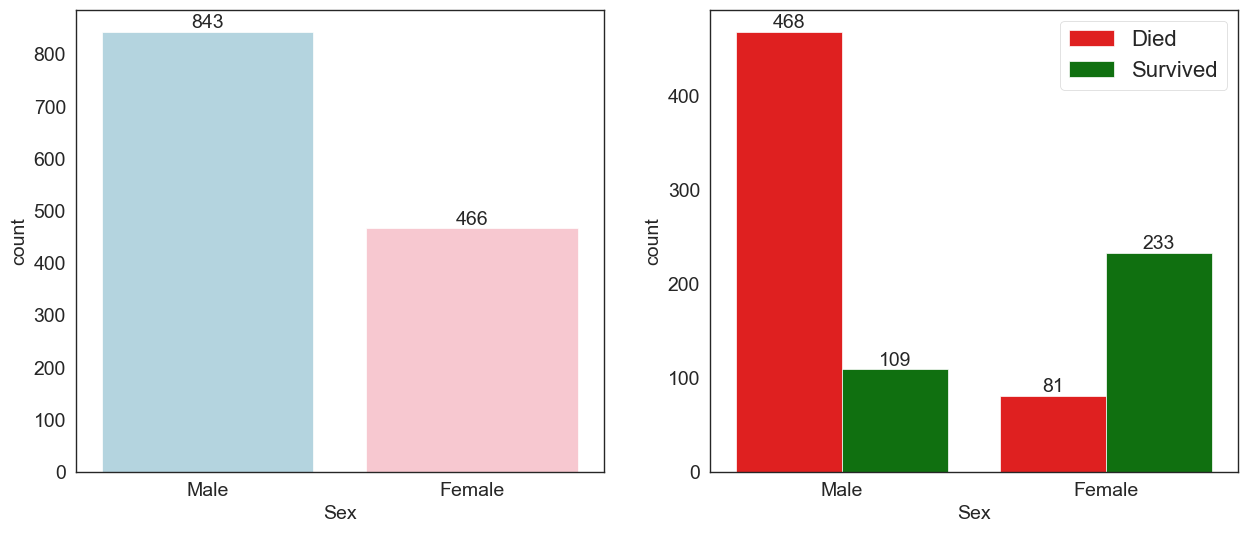

In [17]:
f,ax=plt.subplots(1,2)
cnt2 = sns.countplot(x='Sex',data=all_data, palette=['lightblue','pink'], ax=ax[0])
text_annotate(cnt2)

cnt = sns.countplot(x='Sex',hue='Survived',data=train_df, palette=['red','green'], ax=ax[1])
ax[1].legend(['Died', 'Survived'])
text_annotate(cnt)

In [18]:
train_df['Survived'].count()

891

In [19]:
def get_stats(survival):
    return {'Died':survival.count()-survival.sum(),'Survived':survival.sum(),'All':survival.count(),
           'Survived(%)':'{:.2f}%'.format(survival.mean()*100)}

The proportion of women that survived, along with the proportion of men:

- About the survival rate for genders, **74%** female passengers survived, while only **19%** male passengers survived.

This is a strong indication that if the passenger was a female, she had a better chance of surviving than a male.

In [20]:
train_df['Survived'].groupby(train_df['Sex']).apply(get_stats).unstack()

,Died,Survived,All,Survived(%)
Sex,,,,
Female,81,233,314,74.20%
Male,468,109,577,18.89%


### Pclass

Passenger's class

- 1=Upper
- 2=Middle
- 3=Lower

Passengers of Pclass 1 were given a very high priority while resuce.Even though the number of Passengers in Pclass 3 were a lot higher and the number of survival from them is very low.

It looks like:

- 63% First class passenger survived Titanic tragedy, while
- 48% Second class and
- Only 24% Third class passengers survived

In [21]:
train_df['Survived'].groupby(train_df['Pclass']).apply(get_stats).unstack().rename(index=pclass)

,Died,Survived,All,Survived(%)
Pclass,,,,
Upper,80,136,216,62.96%
Middle,97,87,184,47.28%
Lower,372,119,491,24.24%


People in the first class have more chances of survival than lower class.

In [22]:
#pd.crosstab(train_df['Pclass'], train_df['Survived'])

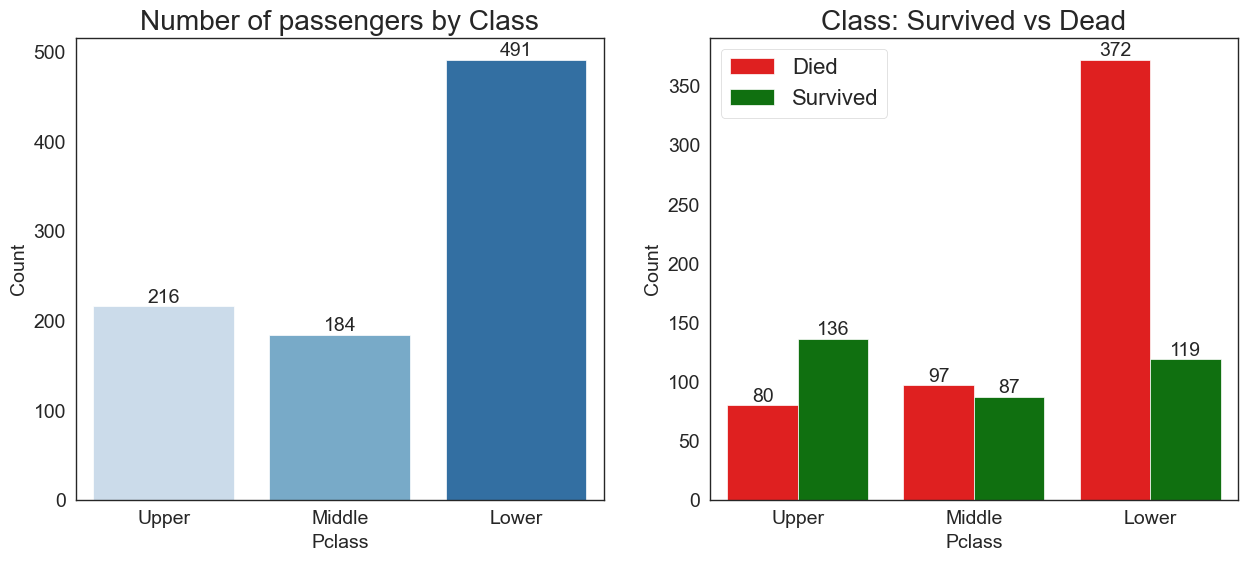

In [23]:
f,ax = plt.subplots(1,2)
labels = ['Upper', 'Middle', 'Lower']
cnt = sns.countplot(x='Pclass', data=train_df, palette='Blues',ax=ax[0])
ax[0].set_title('Number of passengers by Class')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(labels)
text_annotate(cnt)

cnt2 = sns.countplot(x='Pclass', data=train_df, palette=['red', 'green'], hue='Survived', ax=ax[1])
ax[1].set_title('Class: Survived vs Dead')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(labels)
ax[1].legend(['Died', 'Survived'])
text_annotate(cnt2)

**Lets check survival rate with Sex and Pclass together**

Looking at the CrossTab and FactorPlot, we can easily infer that survival of Women from Pclass1 is about 95-96%, as only 3 out of 94 Women died from Pclass1

- Women were given first priority while rescue. Even men frok Pclass1 has very low rate of survival.

In [24]:
train_df.pivot_table(index="Sex", columns="Pclass", aggfunc={"Survived":'sum'}).rename(columns=pclass)

Survived             
Pclass    Upper Middle Lower
Sex                         
Female       91     70    72
Male         45     17    47

In [25]:
average = lambda x : "{:.2f}%".format(np.mean(x)*100)
train_df.pivot_table(index="Sex", columns='Pclass', aggfunc={"Survived":average}).rename(columns=pclass)

Survived                
Pclass    Upper  Middle   Lower
Sex                            
Female   96.81%  92.11%  50.00%
Male     36.89%  15.74%  13.54%

In [26]:
pd.crosstab([train_df['Sex'], train_df['Survived']], train_df['Pclass'], margins=True).rename(columns=pclass, index=survived)

Pclass           Upper  Middle  Lower  All
Sex    Survived                           
Female No            3       6     72   81
       Yes          91      70     72  233
Male   No           77      91    300  468
       Yes          45      17     47  109
All                216     184    491  891

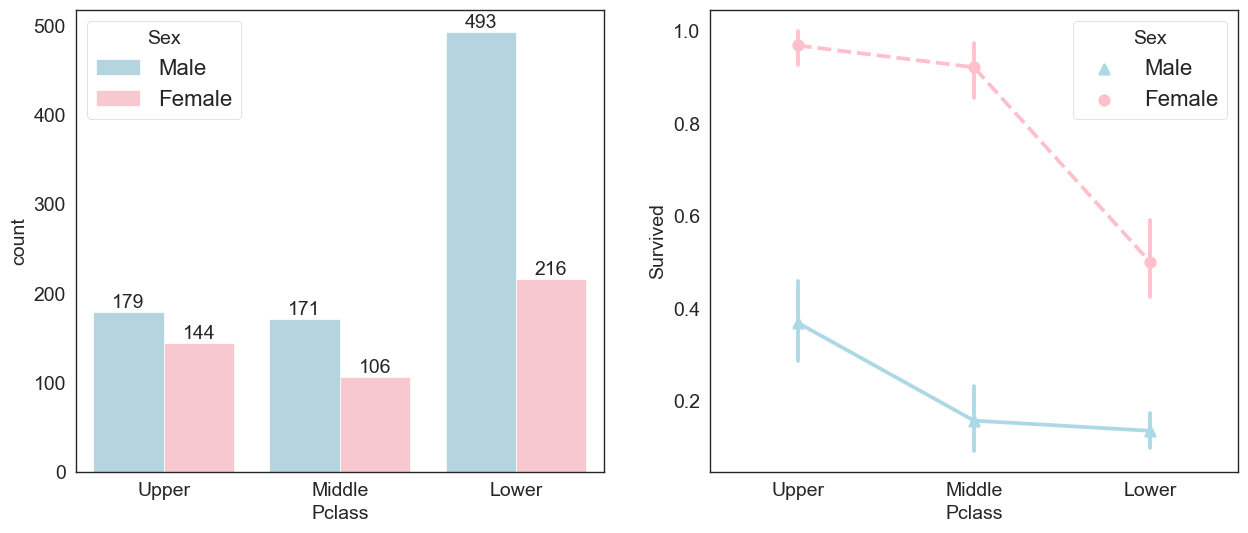

In [27]:
f,ax=plt.subplots(1,2)
cnt = sns.countplot(x='Pclass',data=all_data, palette=['lightblue', 'pink'], hue='Sex', ax=ax[0])
ax[0].set_title('')
ax[0].set_xticklabels(labels)
text_annotate(cnt)

cnt2 = sns.pointplot(x='Pclass', y='Survived', hue="Sex", data=train_df,
                        palette={'Male' : 'lightblue', 'Female' : 'pink'},
                        markers=['^','o'], linestyles=['-', '--'], ax=ax[1])
ax[1].set_title('')
ax[1].set_xticklabels(labels)
plt.show()

### Age

- Survival chances for passengers aged 20-50 from Pclass1 is high and is even better for Women.
- For males, the survival chances decreases with increase in Age.
- Women and Children were given priority when passengers were evacuated to the rescue boats.

In [28]:
print("Oldest passenger was of:", all_data['Age'].max())
print("Youngest passenger was of:", all_data['Age'].min())

Oldest passenger was of: 80.0
Youngest passenger was of: 0.17


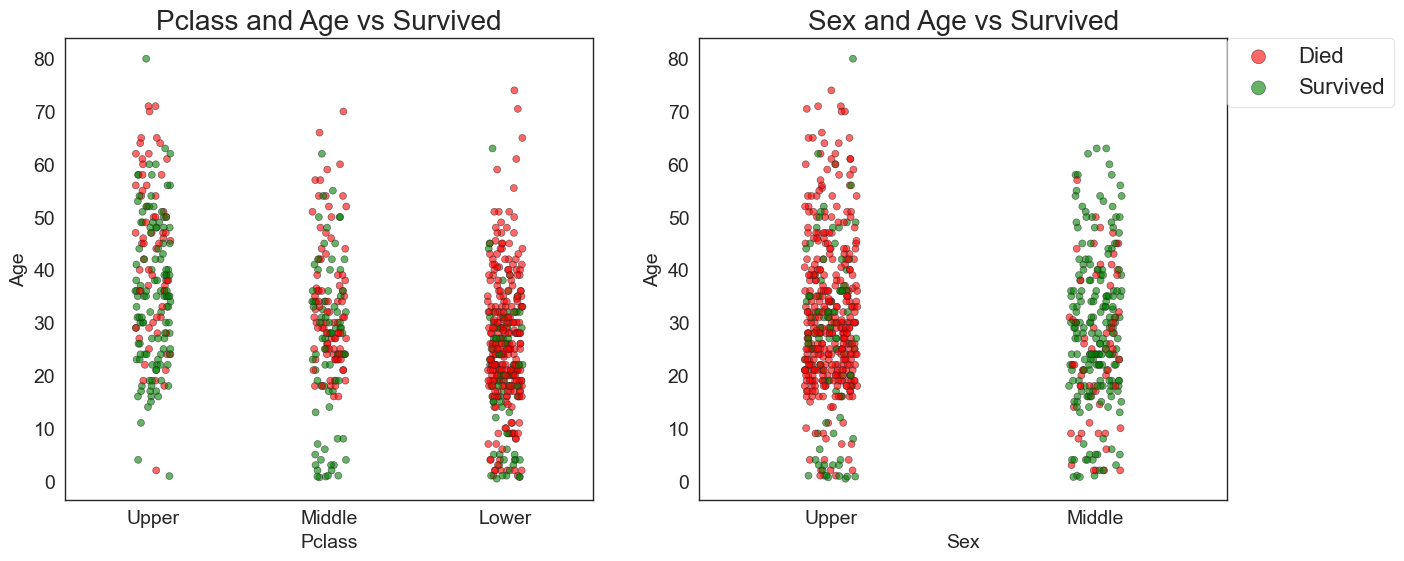

In [29]:
f,ax = plt.subplots(1,2)
sns.stripplot(x='Pclass', y='Age',hue='Survived', palette=['red', 'green'],
              ax=ax[0], data=all_data, jitter=True, linewidth=0.5, alpha=0.6)
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_xticklabels(labels)
ax[0].legend_.remove()

sns.stripplot(x='Sex', y='Age',hue='Survived', palette=['red', 'green'],
              ax=ax[1], data=all_data, jitter=True, linewidth=0.5, alpha=0.6)
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_xticklabels(labels)
plt.legend(['Died','Survived'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,markerscale=2)
plt.show()

It seems that if the passenger is female,they have most chances of survival, and if they were male
they have less chances of survival regardless of whether they were children or not.

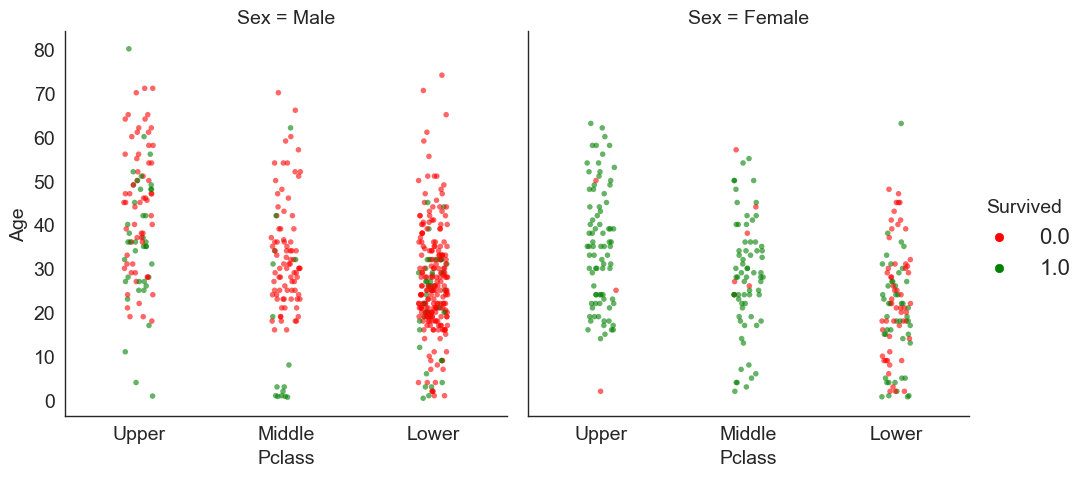

In [30]:
scatplot = sns.catplot(x='Pclass', y='Age', data=all_data, hue='Survived',
                       col='Sex',palette=['red','green'], kind='strip',size=4, alpha=0.6,jitter=True)
scatplot.set_xticklabels(labels)

As we have seen earlier, the **Age** feature has **263** null values.In order to replace these **NaN** values, we can assign them the mean value of the dataset.But the problem is there were many people with different ages.So looking upon the **Name** feature, we can see that the names have a salutation like Mr or Mrs.Thus we can assign the mean valuesof Mr and Mrs to the respective groups.

### Extracting Salutation from Names

Extracting a Title from each name, as that carries information about social and martial status which in turn may relate to survival.

- Using Regex: **[A-Za-z]+)** it looks for strings which lie between A-Z or a-z and followed by a **\\.** (dot) to extract the from the Name.

In [31]:
all_data['Title'] = 0
for i in all_data:
    all_data['Title'] = all_data['Name'].str.extract('([A-Za-z]+)\.')

In [32]:
pd.crosstab(all_data['Title'],all_data['Sex']).T

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
Female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
Male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [33]:
officer = ['Capt', 'Col', 'Dr', 'Major', 'Rev']
nobility = ['Countless', 'Don', 'Dona', 'Jonkheer', 'Lady', 'Sir']
all_data['Title'].replace(officer, 'officer', inplace=True)
all_data['Title'].replace(nobility, 'nobility', inplace=True)
all_data['Title'].replace(['Mlle','Ms','Mme'], ['Miss', 'Miss', 'Mrs'], inplace=True)

In [34]:
all_data.groupby(['Sex','Title']).size().unstack(fill_value=0)

Title,Countess,Master,Miss,Mr,Mrs,nobility,officer
Sex,,,,,,,
Female,1,0,264,0,198,2,1
Male,0,61,0,757,0,3,22


In [38]:
# Check the Average Age by Sex, Title and Passenger class.
group_mean = all_data.groupby(['Sex','Pclass','Title'])['Age'].mean().round()
group_mean

Sex     Pclass  Title   
Female  1       Countess    33.0
                Miss        30.0
                Mrs         43.0
                nobility    44.0
                officer     49.0
        2       Miss        21.0
                Mrs         34.0
        3       Miss        17.0
                Mrs         32.0
Male    1       Master       7.0
                Mr          41.0
                nobility    42.0
                officer     51.0
        2       Master       3.0
                Mr          32.0
                officer     41.0
        3       Master       6.0
                Mr          28.0
Name: Age, dtype: float64

Passengers with Title **Miss, Mrs and Master** had a better rate of survival than the others. Whereas **Mr** had a high rate of death.

- This coincides with the findings of the rate of survival by gender, where females were more likely to survive than males except for the "Master" title.

- The **"Master"** title seems to be a title give to children around the age of 4. The partly confirms the "Women and Children" when wscaping the ship.

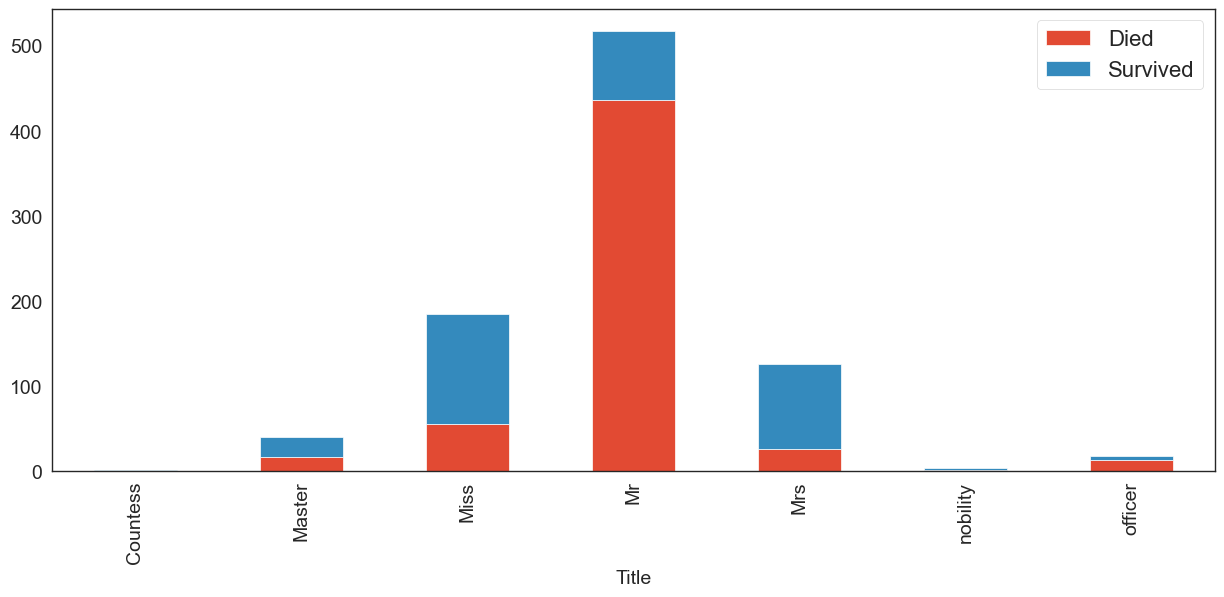

In [37]:
title_survival = all_data.groupby(['Title','Survived'])['Survived'].count().unstack('Survived')

title_survival.plot(kind='bar', stacked=True)
plt.legend(['Died','Survived'])
plt.show()

## Imputation

Filling missing value.

### Age

In [41]:
# Fill missing age with the average Age by Sex, Title and Passenger Class.
all_data['Age'].fillna(all_data.groupby(['Sex','Pclass','Title'])['Age'].transform('mean'),inplace=True)

### Fare

The passenger on row 1044 has an NaN Fare value. Impute the missing value of fare with median for passenger class and embarkment.

In [42]:
all_data[pd.isnull(all_data['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1043,1044,NaN,3,"Storey, Mr. Thomas",Male,60.5,0,0,3701,NaN,NaN,S,Mr


In [43]:
# Fill missing fare value with median fare for class and embarkment
all_data['Fare'].fillna(all_data.groupby(['Pclass','Embarked'])['Fare'].transform("median"), inplace=True)

The fare for first class were predictably much higher than those for second and third class.

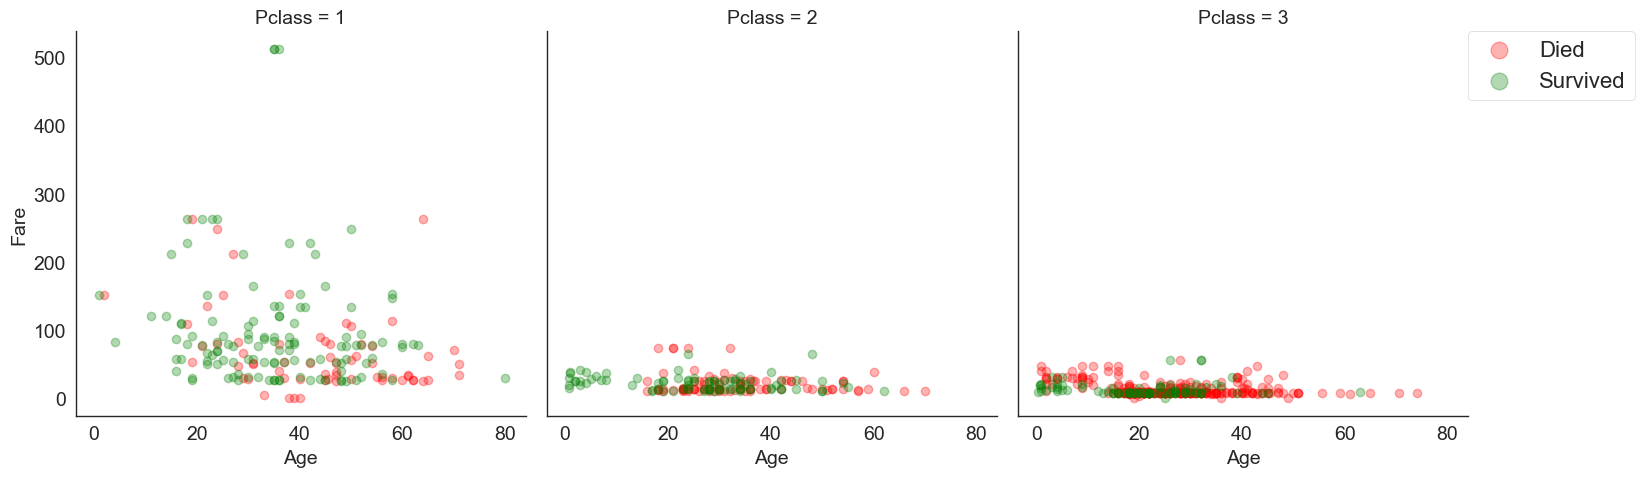

In [44]:
# Plot a scatter plot of 'Age' against 'Fare'.
sns.lmplot(x='Age', y='Fare', hue='Survived',col='Pclass', palette=['red','green'],
           data=train_df, fit_reg=False, scatter_kws={'alpha':0.3},legend=False)
plt.legend(['Died','Survived'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,markerscale=2)
plt.show()

## Embarkment

- Although I feel that the city of Embarkment should not be related to survival rates, I still wanted to check it. As you can see below, there somehow are significant differences between the three ports of embarkment.

In [45]:
# Fill Embarked NaN values of 'S' most frequent value "Embarked" (S).
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)

We can see that a person embarked on Cherbourg Port has a hogher chance of surviving compared to those embarked on Southhampton Port and Queenstown Port.

In [46]:
train_df['Survived'].groupby(train_df['Embarked']).apply(get_stats).unstack().rename(index=embark)


,Died,Survived,All,Survived(%)
Embarked,,,,
Cherbourg,75,93,168,55.36%
Queenstown,47,30,77,38.96%
Southampton,427,217,644,33.70%


### Embarked vs Gender

In [47]:
train_df.pivot_table(index='Sex', columns='Embarked', aggfunc={'Survived': average}).rename(columns=embark)


Survived                       
Embarked  Cherbourg Queenstown Southampton
Sex                                       
Female       87.67%     75.00%      68.97%
Male         30.53%      7.32%      17.46%

### Embarked vs Passenger's Class

The lower class is the most frequent for passenger coming from Southhampton(S) and Queenstown(Q), whereas Cherbuorg passengers are mostly in upper class which have the highest survival rate.

In [48]:
train_df.pivot_table(index='Sex', columns='Embarked', aggfunc={'Survived': average}).rename(columns=embark)


Survived                       
Embarked  Cherbourg Queenstown Southampton
Sex                                       
Female       87.67%     75.00%      68.97%
Male         30.53%      7.32%      17.46%

We can see from the plot that people of hgher social-economic status upper class tend to have higher chance of surviving compared to those of lower social-economic status.